In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import main_single
from os.path import exists
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import os, fnmatch

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import curdoc
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    
    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})
    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: 1999zoeli (sensor-fusion). Use `wandb login --relogin` to force relogin


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


In [3]:
f16gvt_file_path = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear/f16gvt/VAE-RNN_None/f16gvt_h40_z10_n3.csv"

In [4]:
df_f16 = pd.read_csv(f16gvt_file_path)
df_f16.head()

Unnamed: 0  u_test_0  u_test_1  y_test_0  y_test_1  y_test_2  \
0           0  -19.8789  0.048718  -0.17621  0.024852  0.023487   
1           1  -19.2676  0.047532  -0.16643  0.027414  0.025235   
2           2  -18.5664  0.046318  -0.16009  0.027294  0.021213   
3           3  -17.8494  0.045004  -0.15149  0.026408  0.026145   
4           4  -17.1972  0.043646  -0.13726  0.023415  0.020566   

   y_test_noisy_0  y_test_noisy_1  y_test_noisy_2  y_sample_mu_0  \
0        -0.17621        0.024852        0.023487      -0.000002   
1        -0.16643        0.027414        0.025235       0.000272   
2        -0.16009        0.027294        0.021213      -0.003264   
3        -0.15149        0.026408        0.026145      -0.002307   
4        -0.13726        0.023415        0.020566      -0.001056   

   y_sample_mu_1  y_sample_mu_2  y_sample_sigma_0  y_sample_sigma_1  \
0       0.003210      -0.004351          0.060012          0.090993   
1       0.001109       0.000417          0.224743          0.302387   
2       0.000911      -0.001072          0.284665          0.370206   
3      -0.000527      -0.000305          0.422832          0.529646   
4       0.000391       0.001394          0.309154          0.412097   

   y_sample_sigma_2  
0          0.086632  
1          0.271376  
2          0.324616  
3          0.469358  
4          0.362600

In [5]:
len(df_f16["y_test_1"])

5120

In [6]:
df_f16["y_sample_mu_1"]

0       0.003210
1       0.001109
2       0.000911
3      -0.000527
4       0.000391
          ...   
5115    0.001476
5116    0.003236
5117    0.002720
5118    0.002137
5119    0.000819
Name: y_sample_mu_1, Length: 5120, dtype: float64

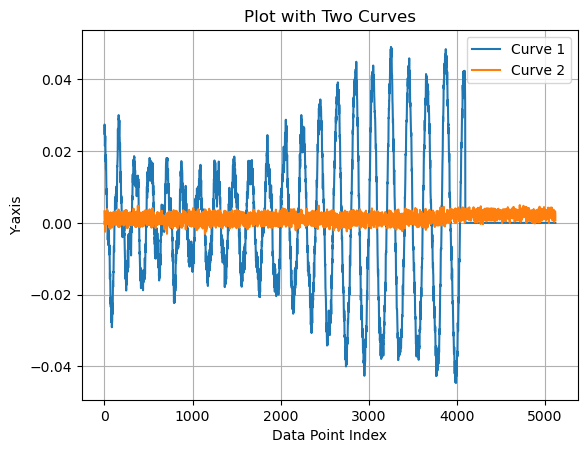

In [7]:
# Prepare data for the first curve
y1 = df_f16["y_test_1"]

# Prepare data for the second curve
y2 = df_f16["y_sample_mu_1"]

# Create the plot and plot the first curve
plt.plot(y1, label='Curve 1')

# Plot the second curve on the same plot
plt.plot(y2, label='Curve 2')

length = len(y1)
x = np.linspace(0, length - 1, length)


mu = df_f16["y_sample_mu_1"]
std = df_f16["y_sample_sigma_1"]
# plot mean
plt.plot(mu, label='y_{}(k) {}'.format(1,"Estimated"))
plt.fill_between(x, mu, mu + 3 * std, alpha=0.3, facecolor='r')
plt.fill_between(x, mu, mu - 3 * std, alpha=0.3, facecolor='r')


mu = df_f16["y_test_1"]
# plot mean
plt.plot(mu, label='y_{}(k) {}'.format(1,"True"),color='b')


plt.title('Output $y_{}(k)$, {} with (h,z,n)=({},{},{})'.format((j + 1),
                                                                options['dataset'],
                                                                options['model_options'].h_dim,
                                                                options['model_options'].z_dim,
                                                                options['model_options'].n_layers))


# Add labels and title
plt.ylabel('$y_{}(k)$'.format(j + 1))
plt.xlabel('time steps $k$')
# Add legend
plt.legend()

# Customize the plot (optional)
plt.grid(True)

# Display the plot
plt.show()

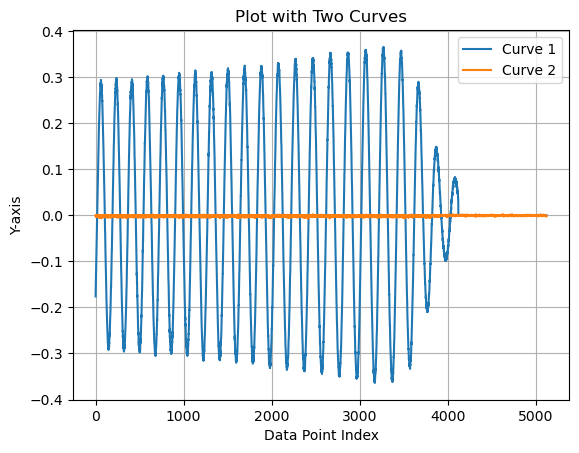

In [8]:
# Prepare data for the first curve
y1 = df_f16["y_test_0"]

# Prepare data for the second curve
y2 = df_f16["y_sample_mu_0"]

# Create the plot and plot the first curve
plt.plot(y1, label='Curve 1')

# Plot the second curve on the same plot
plt.plot(y2, label='Curve 2')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Y-axis')
plt.title('Plot with Two Curves')

# Add legend
plt.legend()

# Customize the plot (optional)
plt.grid(True)

# Display the plot
plt.show()

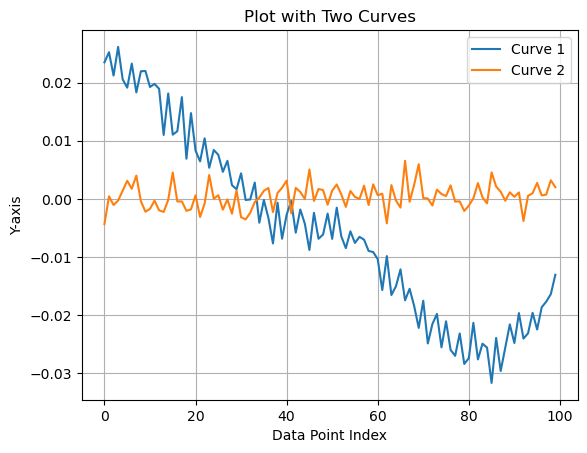

In [9]:
# Prepare data for the first curve
y1 = df_f16["y_test_2"][:100]

# Prepare data for the second curve
y2 = df_f16["y_sample_mu_2"][:100]

# Create the plot and plot the first curve
plt.plot(y1, label='Curve 1')

# Plot the second curve on the same plot
plt.plot(y2, label='Curve 2')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Y-axis')
plt.title('Plot with Two Curves')

# Add legend
plt.legend()

# Customize the plot (optional)
plt.grid(True)

# Display the plot
plt.show()

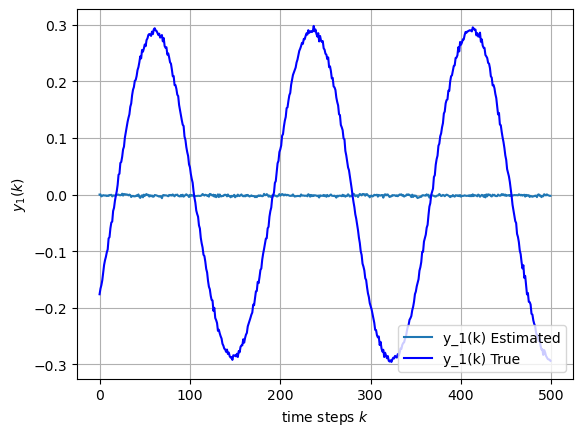

In [68]:
f16gvt_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear/f16gvt/STORN_None/f16gvt_h40_z10_n3.csv"
df_f16 = pd.read_csv(f16gvt_file_path)
df_f16.head()
# Prepare data for the first curve
y1 = df_f16["y_test_1"]

# Prepare data for the second curve
y2 = df_f16["y_sample_mu_1"]

# # Create the plot and plot the first curve
# plt.plot(y1, label='Curve 1')

# # Plot the second curve on the same plot
# plt.plot(y2, label='Curve 2')

length = 500
x = np.linspace(0, length - 1, length)


mu = df_f16["y_sample_mu_0"][0:length]
std = df_f16["y_sample_sigma_0"][0:length]
# plot mean
plt.plot(mu, label='y_{}(k) {}'.format(1,"Estimated"))
# plt.fill_between(x, mu, mu +  std, alpha=0.3, facecolor='r')
# plt.fill_between(x, mu, mu -  std, alpha=0.3, facecolor='r')


mu = df_f16["y_test_0"][0:length]
# plot mean
plt.plot(mu, label='y_{}(k) {}'.format(1,"True"),color='b')



# Add labels and title
plt.ylabel('$y_{}(k)$'.format(0 + 1))
plt.xlabel('time steps $k$')
# Add legend
plt.legend()

# Customize the plot (optional)
plt.grid(True)

# Display the plot
plt.show()

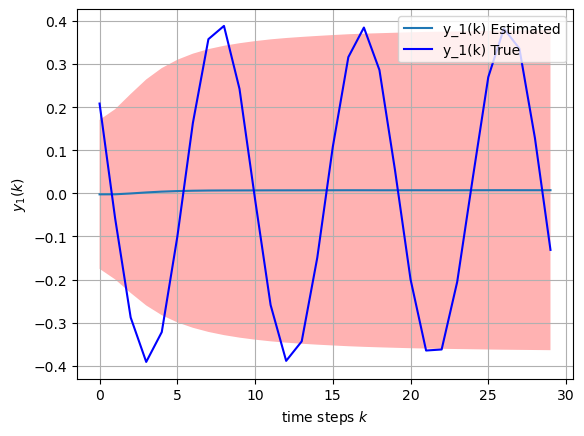

In [78]:
f16gvt_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear/f16gvt/STORN_None/f16gvt_h60_z10_n3_estimation.csv"
df_f16 = pd.read_csv(f16gvt_file_path_STORN)
df_f16.head()
# Prepare data for the first curve
y1 = df_f16["y_test_0"]

# Prepare data for the second curve
y2 = df_f16["y_sample_mu_2"]

# # Create the plot and plot the first curve
# plt.plot(y1, label='Curve 1')

# # Plot the second curve on the same plot
# plt.plot(y2, label='Curve 2')

length = 30
x = np.linspace(0, length - 1, length)


mu = df_f16["y_sample_mu_2"][0:length]
std = df_f16["y_sample_sigma_2"][0:length]
# plot mean
plt.plot(mu, label='y_{}(k) {}'.format(1,"Estimated"))
plt.fill_between(x, mu, mu +  std, alpha=0.3, facecolor='r')
plt.fill_between(x, mu, mu -  std, alpha=0.3, facecolor='r')


mu = df_f16["y_test_0"][0:length]
# plot mean
plt.plot(mu, label='y_{}(k) {}'.format(1,"True"),color='b')



# Add labels and title
plt.ylabel('$y_{}(k)$'.format(0 + 1))
plt.xlabel('time steps $k$')
# Add legend
plt.legend()

# Customize the plot (optional)
plt.grid(True)

# Display the plot
plt.show()

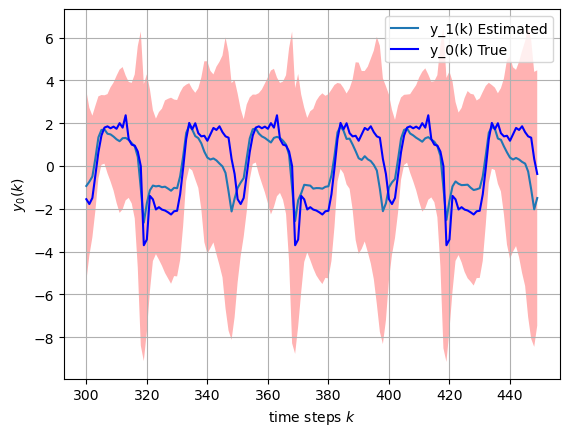

In [56]:
NarendaLi_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear/narendra_li/STORN_None/narendra_li_h60_z10_n1.csv"
NarL = pd.read_csv(NarendaLi_file_path_STORN)
NarL.head()
# Prepare data for the first curve
y1 = NarL["y_test_0"]

# Prepare data for the second curve
y2 = NarL["y_sample_mu_0"]

# # Create the plot and plot the first curve
# plt.plot(y1, label='Curve 1')

# # Plot the second curve on the same plot
# plt.plot(y2, label='Curve 2')

length = 150
start_index = 300
x = np.linspace(start_index, start_index+length - 1, length)


mu = NarL["y_sample_mu_0"][start_index:start_index+length]
std = NarL["y_sample_sigma_0"][start_index:start_index+length]
# plot mean
plt.plot(mu, label='y_{}(k) {}'.format(1,"Estimated"))
plt.fill_between(x, mu, mu +  3 * std, alpha=0.3, facecolor='r')
plt.fill_between(x, mu, mu -  3 * std, alpha=0.3, facecolor='r')


mu = NarL["y_test_0"][start_index:start_index+length]
# plot mean
plt.plot(mu, label='y_{}(k) {}'.format(0,"True"),color='b')



# Add labels and title
plt.ylabel('$y_{}(k)$'.format(0))
plt.xlabel('time steps $k$')
# Add legend
plt.legend()

# Customize the plot (optional)
plt.grid(True)

# Display the plot
plt.show()

In [71]:
df_f16

Unnamed: 0   u_test_0  u_test_1  y_test_0  y_test_1  y_test_2  \
0              0  18.843100 -0.041653  0.208380  0.025498  0.022649   
1              1   0.210390 -0.005809 -0.057858 -0.041013 -0.034572   
2              2 -18.545400  0.032661 -0.288070 -0.089028 -0.080637   
3              3 -29.064000  0.056458 -0.391180 -0.094224 -0.085904   
4              4 -26.486200  0.054905 -0.321910 -0.052541 -0.044317   
...          ...        ...       ...       ...       ...       ...   
2043        2043   0.095809 -0.000173  0.009949 -0.001305  0.002825   
2044        2044   1.159100 -0.000649  0.033833  0.011516  0.017142   
2045        2045   2.050600 -0.000962  0.059223  0.021835  0.023355   
2046        2046   2.723000 -0.001135  0.074910  0.032298  0.034381   
2047        2047   3.134400 -0.001152  0.075216  0.042234  0.042569   

      y_test_noisy_0  y_test_noisy_1  y_test_noisy_2  y_sample_mu_0  \
0           0.208380        0.025498        0.022649      -0.006348   
1          -0.057858       -0.041013       -0.034572      -0.007736   
2          -0.288070       -0.089028       -0.080637      -0.009131   
3          -0.391180       -0.094224       -0.085904      -0.010028   
4          -0.321910       -0.052541       -0.044317      -0.010516   
...              ...             ...             ...            ...   
2043        0.009949       -0.001305        0.002825      -0.014438   
2044        0.033833        0.011516        0.017142      -0.014476   
2045        0.059223        0.021835        0.023355      -0.014519   
2046        0.074910        0.032298        0.034381      -0.014514   
2047        0.075216        0.042234        0.042569      -0.014502   

      y_sample_mu_1  y_sample_mu_2  y_sample_sigma_0  y_sample_sigma_1  \
0         -0.012880      -0.002311          0.139995          0.208848   
1         -0.015171      -0.002166          0.158451          0.238769   
2         -0.016546      -0.000242          0.184777          0.282023   
3         -0.017240       0.002114          0.210077          0.323139   
4         -0.018257       0.004019          0.229587          0.354885   
...             ...            ...               ...               ...   
2043      -0.031244       0.007034          0.299866          0.476728   
2044      -0.031254       0.007065          0.299909          0.476671   
2045      -0.031259       0.007079          0.299947          0.476614   
2046      -0.031256       0.007085          0.299922          0.476567   
2047      -0.031252       0.007085          0.299901          0.476569   

      y_sample_sigma_2  
0             0.172852  
1             0.197470  
2             0.230865  
3             0.262264  
4             0.286710  
...                ...  
2043          0.374333  
2044          0.374351  
2045          0.374355  
2046          0.374317  
2047          0.374311  

[2048 rows x 15 columns]

In [79]:
df_f16

Unnamed: 0   u_test_0  u_test_1  y_test_0  y_test_1  y_test_2  \
0              0  18.843100 -0.041653  0.208380  0.025498  0.022649   
1              1   0.210390 -0.005809 -0.057858 -0.041013 -0.034572   
2              2 -18.545400  0.032661 -0.288070 -0.089028 -0.080637   
3              3 -29.064000  0.056458 -0.391180 -0.094224 -0.085904   
4              4 -26.486200  0.054905 -0.321910 -0.052541 -0.044317   
...          ...        ...       ...       ...       ...       ...   
2043        2043   0.095809 -0.000173  0.009949 -0.001305  0.002825   
2044        2044   1.159100 -0.000649  0.033833  0.011516  0.017142   
2045        2045   2.050600 -0.000962  0.059223  0.021835  0.023355   
2046        2046   2.723000 -0.001135  0.074910  0.032298  0.034381   
2047        2047   3.134400 -0.001152  0.075216  0.042234  0.042569   

      y_test_noisy_0  y_test_noisy_1  y_test_noisy_2  y_sample_mu_0  \
0           0.208380        0.025498        0.022649      -0.006348   
1          -0.057858       -0.041013       -0.034572      -0.007736   
2          -0.288070       -0.089028       -0.080637      -0.009131   
3          -0.391180       -0.094224       -0.085904      -0.010028   
4          -0.321910       -0.052541       -0.044317      -0.010516   
...              ...             ...             ...            ...   
2043        0.009949       -0.001305        0.002825      -0.014438   
2044        0.033833        0.011516        0.017142      -0.014476   
2045        0.059223        0.021835        0.023355      -0.014519   
2046        0.074910        0.032298        0.034381      -0.014514   
2047        0.075216        0.042234        0.042569      -0.014502   

      y_sample_mu_1  y_sample_mu_2  y_sample_sigma_0  y_sample_sigma_1  \
0         -0.012880      -0.002311          0.139995          0.208848   
1         -0.015171      -0.002166          0.158451          0.238769   
2         -0.016546      -0.000242          0.184777          0.282023   
3         -0.017240       0.002114          0.210077          0.323139   
4         -0.018257       0.004019          0.229587          0.354885   
...             ...            ...               ...               ...   
2043      -0.031244       0.007034          0.299866          0.476728   
2044      -0.031254       0.007065          0.299909          0.476671   
2045      -0.031259       0.007079          0.299947          0.476614   
2046      -0.031256       0.007085          0.299922          0.476567   
2047      -0.031252       0.007085          0.299901          0.476569   

      y_sample_sigma_2  
0             0.172852  
1             0.197470  
2             0.230865  
3             0.262264  
4             0.286710  
...                ...  
2043          0.374333  
2044          0.374351  
2045          0.374355  
2046          0.374317  
2047          0.374311  

[2048 rows x 15 columns]

In [43]:

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import curdoc
from bokeh.io import output_notebook
output_notebook()

f16gvt_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_same_rate/f16gvt/STORN_None/f16gvt_h30_z5_n3_FullMSine7_estimation.csv"
# f16gvt_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear/f16gvt/STORN_None/f16gvt_h30_z5_n3_FullMSine7_estimation.csv"
# f16gvt_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_same_rate/f16gvt/STORN_None/f16gvt_h30_z5_n3_SineSw7_estimation.csv"
df_f16 = pd.read_csv(f16gvt_file_path_STORN)

p = figure(width=400, height=400)

# add a scatter circle renderer with a size, color, and alpha

x=list(range(0,df_f16.shape[0]))
y1=df_f16["y_test_0"]
y2=df_f16["y_test_1"]
y3=df_f16["y_test_2"]
y4=df_f16["y_sample_mu_0"]
y5=df_f16["y_sample_mu_1"]
y6=df_f16["y_sample_mu_2"]



# p.multi_line(['x','x','x','x',]['y1', 'y2','y3','y4','y5','y6'] source=source)

p.line(x,y3, color = "red", line_width=2)
p.line(x,y6, color = "blue", line_width=2)

show(p)

p.line(x,y1, color = "red", line_width=2)
p.line(x,y4, color = "blue", line_width=2)

show(p)

p.line(x,y2, color = "red", line_width=2)
p.line(x,y5, color = "blue", line_width=2)

show(p)

Loading BokehJS ...

In [44]:
p = figure(width=1200, height=400)
p.line(x,np.linalg.norm([y1,y2,y3], axis=0), color = "red", line_width=2)
p.line(x,np.linalg.norm([y4,y5,y6], axis=0), color = "blue", line_width=2)
squared_diff = (np.linalg.norm([y1,y2,y3], axis=0) - np.linalg.norm([y4,y5,y6], axis=0)) ** 2

# Compute mean squared difference
mean_squared_diff = np.mean(squared_diff)

# Compute RMSE
rmse = np.sqrt(mean_squared_diff)

print("RMSE:", rmse)
show(p)

RMSE: 1.6225420977123342


In [35]:
magnitude = np.linalg.norm([y1,y2,y3], axis=0)

In [36]:
magnitude

array([0.31208547, 0.33739478, 0.3629197 , ..., 0.12903161, 0.13199607,
       0.13689935])

In [4]:
from scipy.io import loadmat

file_name_train = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/data/IndustRobo/forward_identification_without_raw_data_with_val.mat"
# read the file into variable


'''
# We drop the last two columns because there's only FS and Nan there
df = pd.read_csv(file_name_train)
df = df.iloc[:, :-2]
'''
df_industRobo =  loadmat(file_name_train)

u_train = df_industRobo["u_train"].T
y_train = df_industRobo["y_train"].T

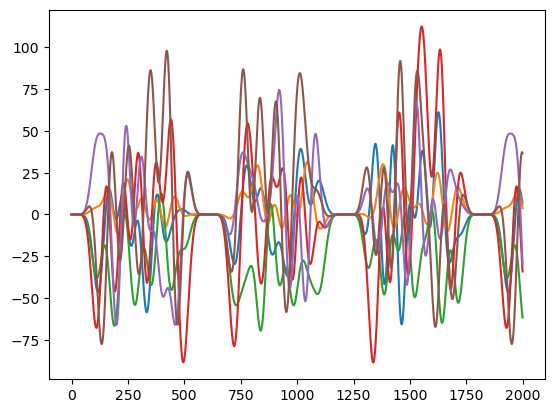

In [9]:
plt.plot(y_train[:2000,:])

In [14]:

def print_rmse_nrmse(y0,y0_hat,start_index,plot_length):
    rmse = np.sqrt(np.mean((y0[start_index:start_index+plot_length] - y0_hat[start_index:start_index+plot_length])**2))
    nrmse = np.sqrt(np.mean((y0[start_index:start_index+plot_length] - y0_hat[start_index:start_index+plot_length])**2))/np.std(y0)
    
    print("rmse is: ", rmse)
    print("nrmse is: ", nrmse)

def print_robo_1d_output(indusrobo_file_path_STORN = None, start_index = 0, plot_length = 4000):
    if indusrobo_file_path_STORN ==None:
        return 0
    df_indusrobo = pd.read_csv(indusrobo_file_path_STORN)

    p = figure(width=1500, height=400)

    x=list(range(0,df_indusrobo.shape[0]))
    plot_length = df_indusrobo.shape[0]
    y0=df_indusrobo["y_test_0"]
    y0_hat=df_indusrobo["y_sample_mu_0"]
    y0_sigma=df_indusrobo["y_sample_sigma_0"]

    p.varea(x[start_index:start_index+plot_length],y1=y0_hat[start_index:start_index+plot_length]+y0_sigma[start_index:start_index+plot_length], y2= y0_hat[start_index:start_index+plot_length]-y0_sigma[start_index:start_index+plot_length], color = "red",alpha=0.5)
    p.line(x[start_index:start_index+plot_length],y0[start_index:start_index+plot_length], color = "blue", line_width=2)
    p.line(x[start_index:start_index+plot_length],y0_hat[start_index:start_index+plot_length], color = "red", line_width=2)

    show(p)
    
    print_rmse_nrmse(y0,y0_hat,start_index,plot_length)
    return df_indusrobo
    

def print_robo_6d_output(indusrobo_file_path_STORN = None, start_index = 0, plot_length = 4000):
    if indusrobo_file_path_STORN ==None:
        return 0
    # indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear/indusrobo/STORN_None/indusrobo_h30_z5_n3_FullMSine7_estimation.csv"
    # indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_same_rate/indusrobo/STORN_None/indusrobo_h30_z5_n3_SineSw7_estimation.csv"
    df_indusrobo = pd.read_csv(indusrobo_file_path_STORN)

    p = figure(width=1500, height=400)

    # add a scatter circle renderer with a size, color, and alpha

    x=list(range(0,df_indusrobo.shape[0]))
    y0=df_indusrobo["y_test_0"]
    y1=df_indusrobo["y_test_1"]
    y2=df_indusrobo["y_test_2"]
    y3=df_indusrobo["y_test_3"]
    y4=df_indusrobo["y_test_4"]
    y5=df_indusrobo["y_test_5"]

    y0_hat=df_indusrobo["y_sample_mu_0"]
    y1_hat=df_indusrobo["y_sample_mu_1"]
    y2_hat=df_indusrobo["y_sample_mu_2"]
    y3_hat=df_indusrobo["y_sample_mu_3"]
    y4_hat=df_indusrobo["y_sample_mu_4"]
    y5_hat=df_indusrobo["y_sample_mu_5"]


    y0_sigma=df_indusrobo["y_sample_sigma_0"]
    y1_sigma=df_indusrobo["y_sample_sigma_1"]
    y2_sigma=df_indusrobo["y_sample_sigma_2"]
    y3_sigma=df_indusrobo["y_sample_sigma_3"]
    y4_sigma=df_indusrobo["y_sample_sigma_4"]
    y5_sigma=df_indusrobo["y_sample_sigma_5"]
    u_1 = df_indusrobo["u_test_1"]
    u_0 = df_indusrobo["u_test_0"]

    # p.line(x,y5, color = "blue", line_width=2)
    p.varea(x[start_index:start_index+plot_length],y1=y0_hat[start_index:start_index+plot_length]+y0_sigma[start_index:start_index+plot_length], y2= y0_hat[start_index:start_index+plot_length]-y0_sigma[start_index:start_index+plot_length], color = "red",alpha=0.5)

    # p.line(x[:1200],y1_sigma[:1200]-(np.mean(y1_sigma[:1200])), color = "black", line_width=2)

    p.line(x[start_index:start_index+plot_length],y0_hat[start_index:start_index+plot_length], color = "red", line_width=2)
    p.line(x[start_index:start_index+plot_length],y0[start_index:start_index+plot_length], color = "blue", line_width=2)
    show(p)

    p = figure(width=1500, height=400)
    p.varea(x[start_index:start_index+plot_length],y1=y1_hat[start_index:start_index+plot_length]+y1_sigma[start_index:start_index+plot_length], y2= y1_hat[start_index:start_index+plot_length]-y1_sigma[start_index:start_index+plot_length], color = "red",alpha=0.5)
    p.line(x[start_index:start_index+plot_length],y1_hat[start_index:start_index+plot_length], color = "red", line_width=2)
    p.line(x[start_index:start_index+plot_length],y1[start_index:start_index+plot_length], color = "blue", line_width=2)
    show(p)
    
    p = figure(width=1500, height=400)
    p.varea(x[start_index:start_index+plot_length],y1=y2_hat[start_index:start_index+plot_length]+y2_sigma[start_index:start_index+plot_length], y2= y2_hat[start_index:start_index+plot_length]-y2_sigma[start_index:start_index+plot_length], color = "red",alpha=0.5)
    p.line(x[start_index:start_index+plot_length],y2_hat[start_index:start_index+plot_length], color = "red", line_width=2)
    p.line(x[start_index:start_index+plot_length],y2[start_index:start_index+plot_length], color = "blue", line_width=2)
    show(p)
    
    p = figure(width=1500, height=400)
    p.varea(x[start_index:start_index+plot_length],y1=y3_hat[start_index:start_index+plot_length]+y3_sigma[start_index:start_index+plot_length], y2= y3_hat[start_index:start_index+plot_length]-y3_sigma[start_index:start_index+plot_length], color = "red",alpha=0.5)
    p.line(x[start_index:start_index+plot_length],y3_hat[start_index:start_index+plot_length], color = "red", line_width=2)
    p.line(x[start_index:start_index+plot_length],y3[start_index:start_index+plot_length], color = "blue", line_width=2)

    show(p)
    p = figure(width=1500, height=400)
    p.varea(x[start_index:start_index+plot_length],y1=y4_hat[start_index:start_index+plot_length]+y4_sigma[start_index:start_index+plot_length], y2= y4_hat[start_index:start_index+plot_length]-y4_sigma[start_index:start_index+plot_length], color = "red",alpha=0.5)
    p.line(x[start_index:start_index+plot_length],y4_hat[start_index:start_index+plot_length], color = "red", line_width=2)
    p.line(x[start_index:start_index+plot_length],y4[start_index:start_index+plot_length], color = "blue", line_width=2)

    show(p)
    p = figure(width=1500, height=400)
    p.varea(x[start_index:start_index+plot_length],y1=y5_hat[start_index:start_index+plot_length]+y5_sigma[start_index:start_index+plot_length], y2= y5_hat[start_index:start_index+plot_length]-y5_sigma[start_index:start_index+plot_length], color = "red",alpha=0.5)
    p.line(x[start_index:start_index+plot_length],y5_hat[start_index:start_index+plot_length], color = "red", line_width=2)
    p.line(x[start_index:start_index+plot_length],y5[start_index:start_index+plot_length], color = "blue", line_width=2)

    show(p)
    
    print_rmse_nrmse(y0,y0_hat,start_index,plot_length)
    print_rmse_nrmse(y1,y1_hat,start_index,plot_length)
    print_rmse_nrmse(y2,y2_hat,start_index,plot_length)
    print_rmse_nrmse(y3,y3_hat,start_index,plot_length)
    print_rmse_nrmse(y4,y4_hat,start_index,plot_length)
    print_rmse_nrmse(y5,y5_hat,start_index,plot_length)
    

    return df_indusrobo

In [83]:
df_indusrobo.describe()


Unnamed: 0    u_test_0    u_test_1    u_test_2    u_test_3    u_test_4  \
count  320.000000  320.000000  320.000000  320.000000  320.000000  320.000000   
mean   159.500000    0.087602   -6.257489   -9.579551   -0.125041   -1.494774   
std     92.520268    2.557972    3.060660    3.234820    0.929267    1.356504   
min      0.000000   -5.569482  -14.236777  -16.693727   -2.192245   -4.425564   
25%     79.750000   -1.844983   -8.654120  -11.989900   -0.882604   -2.533776   
50%    159.500000    0.022533   -5.868207   -9.544515   -0.457764   -1.262647   
75%    239.250000    2.030269   -4.315836   -7.634977    0.731195   -0.639662   
max    319.000000    5.729889    3.176837    0.929665    2.371010    2.452467   

         u_test_5    y_test_0    y_test_1    y_test_2  ...  y_sample_mu_2  \
count  320.000000  320.000000  320.000000  320.000000  ...     320.000000   
mean    -0.036840    2.437198    3.564900  -22.880710  ...     -22.872259   
std      1.239921   18.364365    8.731679   21.234278  ...      10.498348   
min     -2.152449  -54.892880  -15.872061  -79.550766  ...     -34.489470   
25%     -1.172389   -4.137579   -0.580364  -39.842348  ...     -30.186068   
50%      0.294290    0.720632    1.417686  -23.058576  ...     -27.598318   
75%      1.038914   12.385782    9.044333   -1.580819  ...     -17.576062   
max      2.264960   51.089947   35.139084   17.984083  ...       0.145536   

       y_sample_mu_3  y_sample_mu_4  y_sample_mu_5  y_sample_sigma_0  \
count     320.000000     320.000000     320.000000      3.200000e+02   
mean        1.632157       0.044090      -1.413737      5.980874e+00   
std         1.339685       0.736850       2.094992      2.312881e-14   
min        -0.890609      -1.413299      -7.915298      5.980874e+00   
25%         1.115249      -0.482099      -2.086795      5.980874e+00   
50%         1.527983      -0.150353      -0.923704      5.980874e+00   
75%         2.093548       0.566852      -0.362831      5.980874e+00   
max         5.772807       2.271856       3.659895      5.980874e+00   

       y_sample_sigma_1  y_sample_sigma_2  y_sample_sigma_3  y_sample_sigma_4  \
count        320.000000        320.000000        320.000000      3.200000e+02   
mean           7.743844         17.984225         33.878003      6.034134e+00   
std            2.949900          5.988192         13.273988      4.447847e-15   
min            2.425526          6.121069          9.920014      6.034134e+00   
25%            5.363972         13.781993         22.992650      6.034134e+00   
50%            8.771838         20.410490         38.640358      6.034134e+00   
75%           10.031141         22.382588         44.070691      6.034134e+00   
max           12.446318         25.660212         54.738320      6.034134e+00   

       y_sample_sigma_5  
count        320.000000  
mean          33.896102  
std           13.505050  
min           10.016040  
25%           22.398975  
50%           38.672384  
75%           44.293877  
max           55.254154  

[8 rows x 31 columns]

In [32]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_6d_output(indusrobo_file_path_STORN)

rmse is:  9.894131395406328
nrmse is:  0.5396117660171426
rmse is:  8.344804857253655
nrmse is:  0.9571898315150034
rmse is:  20.10967884728133
nrmse is:  0.9485217243716362
rmse is:  39.06132968282761
nrmse is:  1.0164484114234271
rmse is:  17.59396940679747
nrmse is:  1.0078891612647303
rmse is:  35.22830406236455
nrmse is:  1.0577302146472811


Unnamed: 0  u_test_0   u_test_1   u_test_2  u_test_3  u_test_4  u_test_5  \
0             0 -0.155588  -2.520800 -11.189092 -0.922367 -1.028772 -1.583849   
1             1 -0.126939  -2.563425 -11.238746 -0.911541 -1.015886 -1.572550   
2             2  0.026910  -2.500835 -11.478880 -0.915519 -1.006242 -1.546790   
3             3  1.794933  -2.245049 -14.596141 -1.062766 -0.646496  0.311323   
4             4  1.734309  -3.171740 -13.487285 -1.109958 -0.417808  1.522072   
..          ...       ...        ...        ...       ...       ...       ...   
315         315  1.888462  -8.431944  -7.590018  1.114048 -1.078910 -1.530867   
316         316  2.489686  -9.390659  -8.131605  1.299376 -0.941564 -1.619798   
317         317  3.005437 -10.050582  -9.078591  0.949295 -1.443974 -1.178434   
318         318  2.656170 -10.231008 -10.410770 -1.009787 -1.274342  0.277256   
319         319  1.396228  -9.770831 -13.186816 -1.760382 -1.212101  1.270536   

      y_test_0  y_test_1   y_test_2  ...  y_sample_mu_2  y_sample_mu_3  \
0     0.000021 -0.000033   0.000653  ...      -8.197280       1.306665   
1     0.000022 -0.000028   0.000451  ...     -18.377980       1.558031   
2     0.000030 -0.000027   0.000262  ...     -25.628530       1.832459   
3     0.004413  0.002130  -0.013239  ...     -28.507189       2.006588   
4     0.110763  0.032339  -0.245762  ...     -30.179940       2.031928   
..         ...       ...        ...  ...            ...            ...   
315  14.403933  8.699907 -32.889324  ...     -27.545563       1.151475   
316  17.986523  4.385633 -20.755173  ...     -26.238647       0.977015   
317  26.285915 -0.600884  -7.533538  ...     -26.276210       0.791388   
318  38.231243 -4.859493  -0.731301  ...     -28.570745       0.631364   
319  48.590730 -7.402489  -4.818932  ...     -30.980928       0.544435   

     y_sample_mu_4  y_sample_mu_5  y_sample_sigma_0  y_sample_sigma_1  \
0         0.853996      -1.647670          5.980874          3.579455   
1         0.033227      -1.477929          5.980874          5.558019   
2         0.119170      -1.271565          5.980874          7.805832   
3         0.320672      -1.133802          5.980874          9.023067   
4         0.569859      -0.793173          5.980874          9.811027   
..             ...            ...               ...               ...   
315       0.270976       0.561739          5.980874          8.671395   
316       0.347784       0.910907          5.980874          8.111987   
317       0.565850       1.539655          5.980874          8.103949   
318       1.065394       2.714971          5.980874          9.016481   
319       1.497831       3.659895          5.980874         10.105087   

     y_sample_sigma_2  y_sample_sigma_3  y_sample_sigma_4  y_sample_sigma_5  
0            8.791595         14.700674          6.034134         14.602469  
1           14.334358         24.307245          6.034134         23.604984  
2           19.200283         34.688633          6.034134         34.394817  
3           21.423210         40.097860          6.034134         40.251537  
4           22.907060         43.713320          6.034134         44.095440  
..                ...               ...               ...               ...  
315         20.868765         38.527985          6.034134         38.108932  
316         19.795656         35.937313          6.034134         35.533466  
317         19.859196         35.880592          6.034134         35.560135  
318         21.764685         39.943470          6.034134         40.131054  
319         23.890059         44.709145          6.034134         45.599710  

[320 rows x 31 columns]

In [35]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_longseq/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_6d_output(indusrobo_file_path_STORN)

rmse is:  9.674623182182634
nrmse is:  0.5081941087628103
rmse is:  8.542395677054769
nrmse is:  0.9461068366105578
rmse is:  19.32123031444431
nrmse is:  0.9130915865144779
rmse is:  39.46535535112739
nrmse is:  1.0297213903686135
rmse is:  17.256474858696205
nrmse is:  0.9055226256611055
rmse is:  35.651049763490825
nrmse is:  1.027702978253097


Unnamed: 0  u_test_0  u_test_1   u_test_2  u_test_3  u_test_4  u_test_5  \
0              0 -0.155588 -2.520800 -11.189092 -0.922367 -1.028772 -1.583849   
1              1 -0.138527 -2.576625 -11.166842 -0.912601 -1.018995 -1.572614   
2              2 -0.127814 -2.594227 -11.177425 -0.908791 -1.015158 -1.569217   
3              3 -0.127583 -2.582014 -11.202688 -0.909910 -1.016418 -1.571584   
4              4 -0.134428 -2.570305 -11.214664 -0.911790 -1.018061 -1.572635   
...          ...       ...       ...        ...       ...       ...       ...   
3579        3579 -1.152366 -9.163560  -9.652832  0.566872 -1.459233  0.527361   
3580        3580 -1.158055 -9.176152  -9.631248  0.518406 -1.449528  0.568019   
3581        3581 -1.179851 -9.165711  -9.590615  0.482044 -1.443523  0.609639   
3582        3582 -1.213605 -9.169878  -9.580918  0.486457 -1.443839  0.640272   
3583        3583 -1.247735 -9.177155  -9.593780  0.503438 -1.438474  0.667747   

      y_test_0  y_test_1  y_test_2  ...  y_sample_mu_2  y_sample_mu_3  \
0     0.000021 -0.000033  0.000653  ...      -4.389575       0.093810   
1     0.000020 -0.000043  0.000583  ...     -13.447521       0.135997   
2     0.000006 -0.000032  0.000582  ...     -21.054132       0.169290   
3    -0.000007 -0.000018  0.000600  ...     -24.846466       0.141477   
4    -0.000013 -0.000016  0.000576  ...     -25.575321       0.525095   
...        ...       ...       ...  ...            ...            ...   
3579  1.228341  1.892957 -2.174655  ...      -0.153833      -0.722560   
3580  1.101744  1.693122 -1.946524  ...      -0.142283      -0.738271   
3581  0.984252  1.510444 -1.736912  ...      -0.142366      -0.741412   
3582  0.876935  1.344486 -1.544961  ...      -0.134048      -0.752431   
3583  0.779567  1.193177 -1.369081  ...      -0.130556      -0.759516   

      y_sample_mu_4  y_sample_mu_5  y_sample_sigma_0  y_sample_sigma_1  \
0         -0.029052      -0.406013          5.456404          2.692823   
1         -5.666756      -1.970431          5.456404          4.395489   
2         -8.456020      -2.666407          5.456404          6.754376   
3         -9.559905      -2.831032          5.456404          8.341187   
4         -7.613280      -2.324388          5.456404          8.637244   
...             ...            ...               ...               ...   
3579      -0.226303      -0.448648          5.456404          2.197171   
3580      -0.368551      -0.473364          5.456404          2.197171   
3581      -0.310505      -0.467765          5.456404          2.197171   
3582      -0.349558      -0.476000          5.456404          2.197171   
3583      -0.207926      -0.468989          5.456404          2.197171   

      y_sample_sigma_2  y_sample_sigma_3  y_sample_sigma_4  y_sample_sigma_5  
0             6.983282         10.717721          6.478495         10.388750  
1            11.783166         19.107840         12.021927         16.715368  
2            17.666140         30.831009         20.288000         26.205260  
3            21.514841         38.908330         26.417067         32.983936  
4            21.818810         39.757820         27.725200         35.168670  
...                ...               ...               ...               ...  
3579          5.600617          9.037107          5.467284          9.022903  
3580          5.611084          9.037107          5.467284          9.022903  
3581          5.601429          9.037107          5.467284          9.022903  
3582          5.600885          9.037107          5.467284          9.022903  
3583          5.579270          9.037107          5.467284          9.022903  

[3584 rows x 31 columns]

In [12]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_1d_output(indusrobo_file_path_STORN)

In [15]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_1d_output(indusrobo_file_path_STORN)

In [16]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_1d_output(indusrobo_file_path_STORN)

In [17]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_1d_output(indusrobo_file_path_STORN)

In [3]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map_1/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_1d_output(indusrobo_file_path_STORN)

rmse is:  18.45396543687773
nrmse is:  0.9693603917933707


Unnamed: 0  u_test_0  y_test_0  y_test_noisy_0  y_sample_mu_0  \
0              0 -0.155588  0.000021        0.000021      -0.323240   
1              1 -0.138527  0.000020        0.000020      -0.366891   
2              2 -0.127814  0.000006        0.000006      -0.440847   
3              3 -0.127583 -0.000007       -0.000007      -0.576017   
4              4 -0.134428 -0.000013       -0.000013      -0.729132   
...          ...       ...       ...             ...            ...   
3579        3579 -1.152366  1.228341        1.228341      -2.573410   
3580        3580 -1.158055  1.101744        1.101744      -2.578707   
3581        3581 -1.179851  0.984252        0.984252      -2.582454   
3582        3582 -1.213605  0.876935        0.876935      -2.585219   
3583        3583 -1.247735  0.779567        0.779567      -2.584857   

      y_sample_sigma_0  
0             6.720281  
1             8.492057  
2            11.719539  
3            14.395432  
4            15.725183  
...                ...  
3579         15.197979  
3580         15.126930  
3581         15.093595  
3582         15.045308  
3583         15.062764  

[3584 rows x 6 columns]

In [19]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_1d_output(indusrobo_file_path_STORN)

In [3]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_1d_output(indusrobo_file_path_STORN)

In [16]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map_2/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
df_robo_single_2 = print_robo_1d_output(indusrobo_file_path_STORN)

rmse is:  7.786226442889907
nrmse is:  0.862357861601172


In [12]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map_3/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
df_robo_single_3=print_robo_1d_output(indusrobo_file_path_STORN)

rmse is:  13.197311572038899
nrmse is:  0.6236846186772166


In [15]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map_4/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
df_robo_single_4=print_robo_1d_output(indusrobo_file_path_STORN)

rmse is:  31.957703613759314
nrmse is:  0.8338333889399085


In [9]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map_5/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_1d_output(indusrobo_file_path_STORN)

rmse is:  18.627535536843347
nrmse is:  0.9774681693125566


Unnamed: 0  u_test_0      y_test_0  y_test_noisy_0  y_sample_mu_0  \
0              0 -1.028772 -5.732465e-07   -5.732465e-07      -1.420146   
1              1 -1.018995  2.542007e-08    2.542007e-08       4.140616   
2              2 -1.015158  1.620524e-07    1.620524e-07       6.107641   
3              3 -1.016418 -2.500546e-07   -2.500546e-07      10.623219   
4              4 -1.018061 -4.705888e-07   -4.705888e-07      11.595699   
...          ...       ...           ...             ...            ...   
3579        3579 -1.459233 -1.745176e+00   -1.745176e+00       0.147711   
3580        3580 -1.449528 -1.588065e+00   -1.588065e+00      -0.190580   
3581        3581 -1.443523 -1.439001e+00   -1.439001e+00      -0.627746   
3582        3582 -1.443839 -1.298412e+00   -1.298412e+00      -0.589574   
3583        3583 -1.438474 -1.166564e+00   -1.166564e+00      -0.165288   

      y_sample_sigma_0  
0             6.846316  
1             7.338057  
2             7.333891  
3             6.724278  
4             6.247041  
...                ...  
3579          5.467285  
3580          5.467285  
3581          5.467285  
3582          5.467285  
3583          5.467285  

[3584 rows x 6 columns]

In [10]:
indusrobo_file_path_STORN = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/log/single_Nonlinear_1to1map_6/industrobo/STORN_None/industrobo_h50_z5_n3_estimation.csv"
print_robo_1d_output(indusrobo_file_path_STORN)

rmse is:  30.605603362111314
nrmse is:  0.8822592864764772


Unnamed: 0  u_test_0      y_test_0  y_test_noisy_0  y_sample_mu_0  \
0              0 -1.583849 -7.051250e-08   -7.051250e-08      -1.548798   
1              1 -1.572614  8.705299e-08    8.705299e-08      -1.618696   
2              2 -1.569217 -9.484886e-09   -9.484886e-09      -5.439840   
3              3 -1.571584 -2.078209e-07   -2.078209e-07     -10.617132   
4              4 -1.572635 -1.007450e-07   -1.007450e-07     -15.157453   
...          ...       ...           ...             ...            ...   
3579        3579  0.527361 -1.042157e+00   -1.042157e+00       3.173188   
3580        3580  0.568019 -8.941916e-01   -8.941916e-01       3.130241   
3581        3581  0.609639 -7.632331e-01   -7.632331e-01       3.109916   
3582        3582  0.640272 -6.478875e-01   -6.478875e-01       3.144021   
3583        3583  0.667747 -5.468627e-01   -5.468627e-01       3.174168   

      y_sample_sigma_0  
0            11.525465  
1            12.809164  
2            13.445704  
3            13.441063  
4            13.607923  
...                ...  
3579          9.022903  
3580          9.022903  
3581          9.022903  
3582          9.022903  
3583          9.022903  

[3584 rows x 6 columns]